# Deriving Important Statistics from Data
In the below python code, we have shown the study of important statistical measures and their relationship across various classification variables

In [2]:
import pandas as pd
import numpy as np

In [4]:
# Reading the clean and combined output file after basic EDA analysis
claims_per_customer = pd.read_csv('../output/claims_data_combined.csv')
claims_per_customer.head()

CUST_ID  gender DateOfBirth State       Contact   Segment  customer_age  \
0  21868593  Female   12-Jan-79    VT  789-916-8172  Platinum            40   
1  16868327    Male   14-Feb-68    VT  426-293-4958    Silver            51   
2  20960664  Female   28-Oct-87    VT  276-719-1489  Platinum            31   
3  68615086    Male   12-Nov-80    VT  326-937-6952  Platinum            38   
4  49078798    Male   07-May-65    VT  168-931-2841      Gold            54   

   claim_id  incident_cause  claim_date claim_area police_report  \
0  54004764    Driver error  11/27/2017       Auto            No   
1   3883874    Driver error  01/14/2017       Auto            No   
2  18499217  Natural causes  08/10/2018       Auto           Yes   
3  66563034    Driver error  07/07/2018       Auto            No   
4  69278867  Natural causes  02/02/2018       Auto            No   

            claim_type claim_amount  total_policy_claims fraudulent StateName  \
0        Material only        $2980                    1         No   Vermont   
1        Material only        $1400                    1         No   Vermont   
2          Injury only     $19676.5                    1        Yes   Vermont   
3  Material and injury       $17670                    1         No   Vermont   
4        Material only        $1350                    1         No   Vermont   

      Region    SubRegion  
0  NorthEast  New England  
1  NorthEast  New England  
2  NorthEast  New England  
3  NorthEast  New England  
4  NorthEast  New England

In [7]:
# Converting the claims amount to float data type
claims_per_customer['claim_amount'] = claims_per_customer['claim_amount'].replace('[\$,]', '', regex=True).astype(float)
claims_per_customer.head()

CUST_ID  gender DateOfBirth State       Contact   Segment  customer_age  \
0  21868593  Female   12-Jan-79    VT  789-916-8172  Platinum            40   
1  16868327    Male   14-Feb-68    VT  426-293-4958    Silver            51   
2  20960664  Female   28-Oct-87    VT  276-719-1489  Platinum            31   
3  68615086    Male   12-Nov-80    VT  326-937-6952  Platinum            38   
4  49078798    Male   07-May-65    VT  168-931-2841      Gold            54   

   claim_id  incident_cause  claim_date claim_area police_report  \
0  54004764    Driver error  11/27/2017       Auto            No   
1   3883874    Driver error  01/14/2017       Auto            No   
2  18499217  Natural causes  08/10/2018       Auto           Yes   
3  66563034    Driver error  07/07/2018       Auto            No   
4  69278867  Natural causes  02/02/2018       Auto            No   

            claim_type  claim_amount  total_policy_claims fraudulent  \
0        Material only        2980.0                    1         No   
1        Material only        1400.0                    1         No   
2          Injury only       19676.5                    1        Yes   
3  Material and injury       17670.0                    1         No   
4        Material only        1350.0                    1         No   

  StateName     Region    SubRegion  
0   Vermont  NorthEast  New England  
1   Vermont  NorthEast  New England  
2   Vermont  NorthEast  New England  
3   Vermont  NorthEast  New England  
4   Vermont  NorthEast  New England

In [11]:
claims_per_customer = claims_per_customer.dropna()
claims_per_customer.shape

(1082, 19)

In [13]:
#segregate population into different categories based on age 
def population_category(age):
    if age < 18:
        return 'Children'
    elif age < 30:
        return 'Youth'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

In [16]:
claims_per_customer['population_category'] = claims_per_customer['customer_age'].apply(population_category)
claims_per_customer.head()

CUST_ID  gender DateOfBirth State       Contact   Segment  customer_age  \
0  21868593  Female   12-Jan-79    VT  789-916-8172  Platinum            40   
1  16868327    Male   14-Feb-68    VT  426-293-4958    Silver            51   
2  20960664  Female   28-Oct-87    VT  276-719-1489  Platinum            31   
3  68615086    Male   12-Nov-80    VT  326-937-6952  Platinum            38   
4  49078798    Male   07-May-65    VT  168-931-2841      Gold            54   

   claim_id  incident_cause  claim_date claim_area police_report  \
0  54004764    Driver error  11/27/2017       Auto            No   
1   3883874    Driver error  01/14/2017       Auto            No   
2  18499217  Natural causes  08/10/2018       Auto           Yes   
3  66563034    Driver error  07/07/2018       Auto            No   
4  69278867  Natural causes  02/02/2018       Auto            No   

            claim_type  claim_amount  total_policy_claims fraudulent  \
0        Material only        2980.0                    1         No   
1        Material only        1400.0                    1         No   
2          Injury only       19676.5                    1        Yes   
3  Material and injury       17670.0                    1         No   
4        Material only        1350.0                    1         No   

  StateName     Region    SubRegion population_category  
0   Vermont  NorthEast  New England               Adult  
1   Vermont  NorthEast  New England               Adult  
2   Vermont  NorthEast  New England               Adult  
3   Vermont  NorthEast  New England               Adult  
4   Vermont  NorthEast  New England               Adult

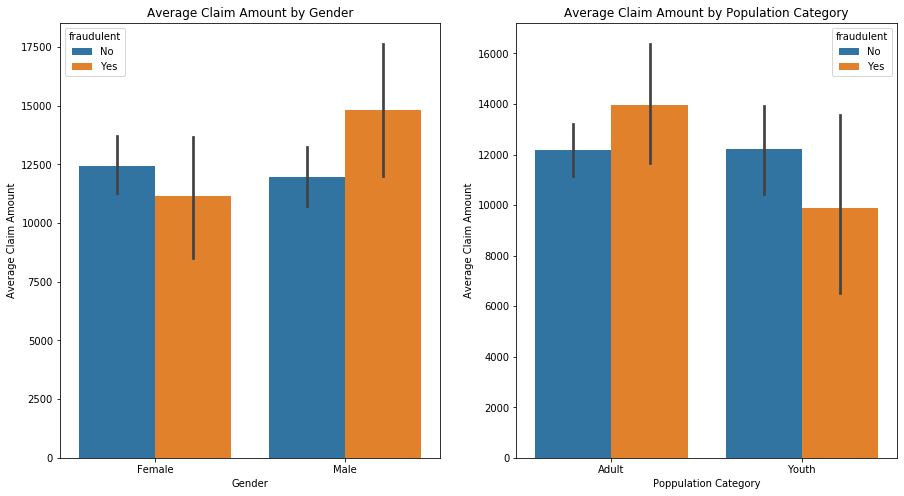

In [76]:
fig, ax = plt.subplots(1,2, figsize = (15,8))

#sns.set_palette('colorblind')
sns.barplot(x = 'gender', y = 'claim_amount', hue = 'fraudulent', data = claims_per_customer, ax = ax[0])
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Average Claim Amount')
ax[0].set_title('Average Claim Amount by Gender');

sns.barplot(x = 'population_category', y = 'claim_amount', hue = 'fraudulent', data = claims_per_customer, ax = ax[1])
ax[1].set_xlabel('Poppulation Category')
ax[1].set_ylabel('Average Claim Amount')
ax[1].set_title('Average Claim Amount by Population Category');

The above plots show us that the average fraudulent claims for males is higher than females and similarly it is higher for adults when compared with youths.

In [19]:
#Checking the basic statistical measure for claim amount
claims_per_customer['claim_amount'].describe()

count     1082.000000
mean     12354.201479
std      13714.446679
min       1000.000000
25%       1890.000000
50%       2749.250000
75%      23975.000000
max      48150.500000
Name: claim_amount, dtype: float64

From looking at the basic mean, median, standard deviation and quantiles of the claim amount data we can see that their is huge variation and there are some very high values which are skewing the distribution.

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

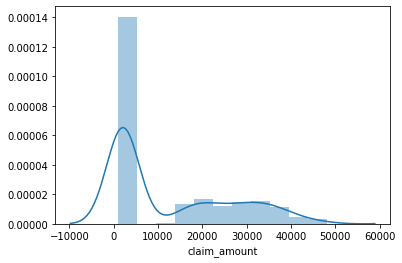

In [22]:
# Let us look at the distribution of claim amount
sns.distplot(claims_per_customer['claim_amount']);

This clearly proves that the claim amounts have a break point between ~4000-13000, where there are no claims. For comparison purposes across classifiers, let us label the claims with amount less than 10000 as low value claims and the others as high value claims.

In [30]:
def claim_amount_category(claim):
    if claim < 5000:
        return 'Low_value'
    else:
        return 'High_value'

In [31]:
claims_per_customer['claim_amount_category'] = claims_per_customer['claim_amount'].apply(claim_amount_category)
claims_per_customer.head()

CUST_ID  gender DateOfBirth State       Contact   Segment  customer_age  \
0  21868593  Female   12-Jan-79    VT  789-916-8172  Platinum            40   
1  16868327    Male   14-Feb-68    VT  426-293-4958    Silver            51   
2  20960664  Female   28-Oct-87    VT  276-719-1489  Platinum            31   
3  68615086    Male   12-Nov-80    VT  326-937-6952  Platinum            38   
4  49078798    Male   07-May-65    VT  168-931-2841      Gold            54   

   claim_id  incident_cause  claim_date  ... police_report  \
0  54004764    Driver error  11/27/2017  ...            No   
1   3883874    Driver error  01/14/2017  ...            No   
2  18499217  Natural causes  08/10/2018  ...           Yes   
3  66563034    Driver error  07/07/2018  ...            No   
4  69278867  Natural causes  02/02/2018  ...            No   

            claim_type claim_amount  total_policy_claims  fraudulent  \
0        Material only       2980.0                    1          No   
1        Material only       1400.0                    1          No   
2          Injury only      19676.5                    1         Yes   
3  Material and injury      17670.0                    1          No   
4        Material only       1350.0                    1          No   

  StateName     Region    SubRegion population_category claim_amount_category  
0   Vermont  NorthEast  New England               Adult             Low_value  
1   Vermont  NorthEast  New England               Adult             Low_value  
2   Vermont  NorthEast  New England               Adult            High_value  
3   Vermont  NorthEast  New England               Adult            High_value  
4   Vermont  NorthEast  New England               Adult             Low_value  

[5 rows x 21 columns]

In [32]:
claims_per_customer['claim_amount'].loc[claims_per_customer['claim_amount_category'] == 'Low_value'].describe()

count     651.000000
mean     2075.938556
std       620.526297
min      1000.000000
25%      1550.000000
50%      2093.000000
75%      2580.000000
max      3427.000000
Name: claim_amount, dtype: float64

In [33]:
claims_per_customer['claim_amount'].loc[claims_per_customer['claim_amount_category'] == 'High_value'].describe()

count      431.000000
mean     27878.909513
std       8410.846497
min      13090.000000
25%      20474.250000
50%      27670.000000
75%      34255.000000
max      48150.500000
Name: claim_amount, dtype: float64

Now we can see that the statistical measures make more sense across the two categories.

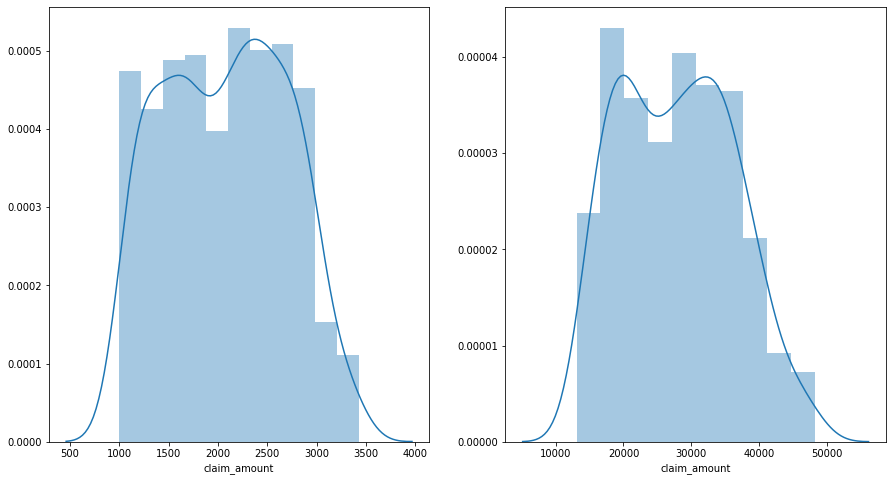

In [34]:
fig, ax = plt.subplots(1,2, figsize = (15,8))
sns.distplot(claims_per_customer['claim_amount'].loc[claims_per_customer['claim_amount_category'] == 'Low_value'], ax = ax[0])
sns.distplot(claims_per_customer['claim_amount'].loc[claims_per_customer['claim_amount_category'] == 'High_value'], ax = ax[1]);

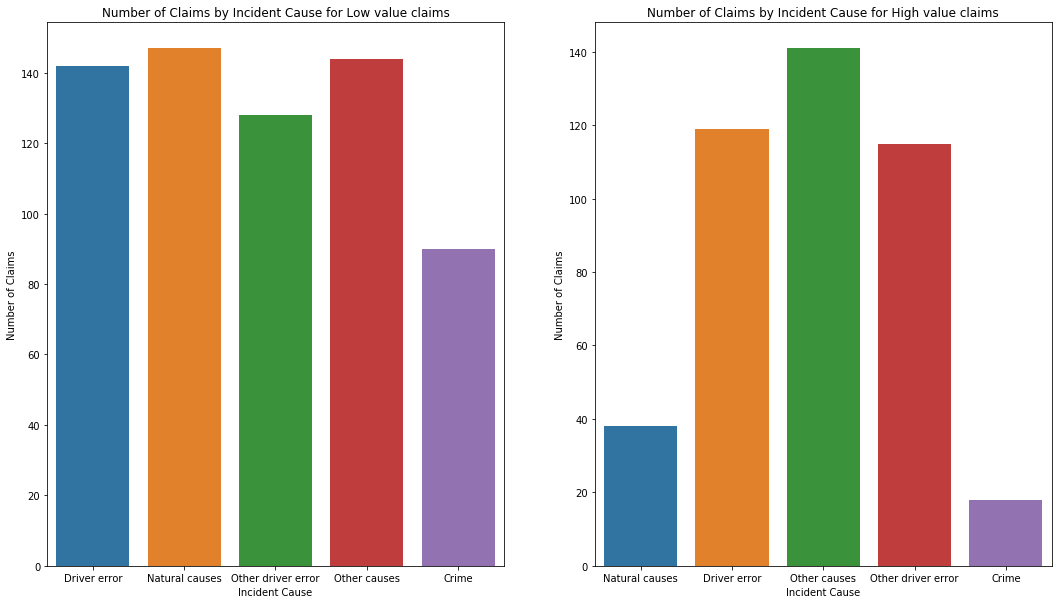

In [46]:
fig, ax = plt.subplots(1,2, figsize = (18,10))

#sns.set_palette('colorblind')
sns.countplot(x = 'incident_cause', data = claims_per_customer.loc[claims_per_customer['claim_amount_category'] == 'Low_value'], ax = ax[0])
ax[0].set_xlabel('Incident Cause')
ax[0].set_ylabel('Number of Claims')
ax[0].set_title('Number of Claims by Incident Cause for Low value claims');

sns.countplot(x = 'incident_cause', data = claims_per_customer.loc[claims_per_customer['claim_amount_category'] == 'High_value'], ax = ax[1])
ax[1].set_xlabel('Incident Cause')
ax[1].set_ylabel('Number of Claims')
ax[1].set_title('Number of Claims by Incident Cause for High value claims');

In [59]:
claims_per_customer.head()

CUST_ID  gender DateOfBirth State       Contact   Segment  customer_age  \
0  21868593  Female   12-Jan-79    VT  789-916-8172  Platinum            40   
1  16868327    Male   14-Feb-68    VT  426-293-4958    Silver            51   
2  20960664  Female   28-Oct-87    VT  276-719-1489  Platinum            31   
3  68615086    Male   12-Nov-80    VT  326-937-6952  Platinum            38   
4  49078798    Male   07-May-65    VT  168-931-2841      Gold            54   

   claim_id  incident_cause  claim_date  ...           claim_type  \
0  54004764    Driver error  11/27/2017  ...        Material only   
1   3883874    Driver error  01/14/2017  ...        Material only   
2  18499217  Natural causes  08/10/2018  ...          Injury only   
3  66563034    Driver error  07/07/2018  ...  Material and injury   
4  69278867  Natural causes  02/02/2018  ...        Material only   

  claim_amount total_policy_claims  fraudulent  StateName     Region  \
0       2980.0                   1          No    Vermont  NorthEast   
1       1400.0                   1          No    Vermont  NorthEast   
2      19676.5                   1         Yes    Vermont  NorthEast   
3      17670.0                   1          No    Vermont  NorthEast   
4       1350.0                   1          No    Vermont  NorthEast   

     SubRegion population_category claim_amount_category claim_year  
0  New England               Adult             Low_value       2017  
1  New England               Adult             Low_value       2017  
2  New England               Adult            High_value       2018  
3  New England               Adult            High_value       2018  
4  New England               Adult             Low_value       2018  

[5 rows x 22 columns]

In [58]:
claims_per_customer['claim_year'] = claims_per_customer['claim_date'].apply(lambda x: x.split('/')[2])

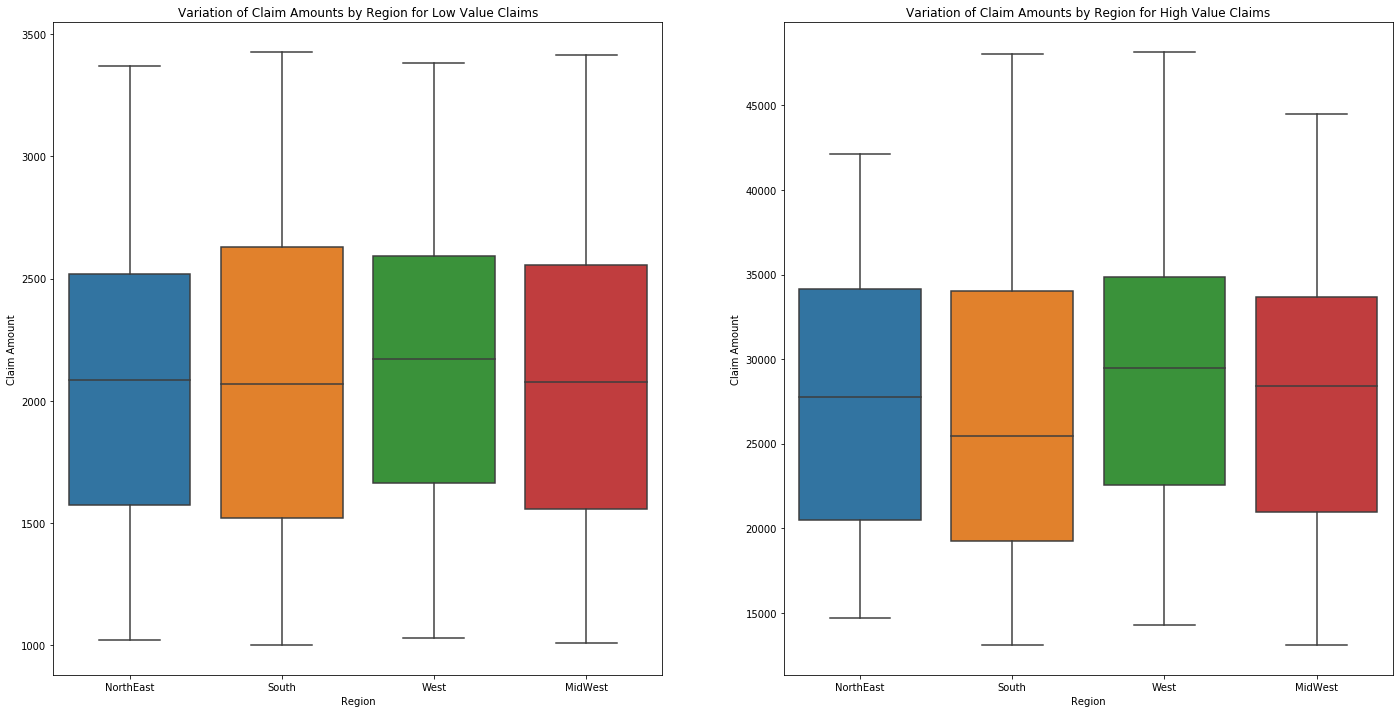

In [74]:
fig, ax = plt.subplots(1,2, figsize = (24,12))

#sns.set_palette('colorblind')
sns.boxplot(x = 'Region', y = 'claim_amount', data = claims_per_customer.loc[claims_per_customer['claim_amount_category'] == 'Low_value'], ax = ax[0])
ax[0].set_xlabel('Region')
ax[0].set_ylabel('Claim Amount')
ax[0].set_title('Variation of Claim Amounts by Region for Low Value Claims');

sns.boxplot(x = 'Region', y = 'claim_amount', data = claims_per_customer.loc[claims_per_customer['claim_amount_category'] == 'High_value'], ax = ax[1])
ax[1].set_xlabel('Region')
ax[1].set_ylabel('Claim Amount')
ax[1].set_title('Variation of Claim Amounts by Region for High Value Claims');

In [85]:
import math

In [89]:
# Establishing a relationship between claims made by males and females. 
# We are using a z-test assuming a normal distribution for low-value claims
low_value_claims = claims_per_customer.loc[claims_per_customer['claim_amount_category']=='Low_value']
low_value_claims_male = low_value_claims.loc[low_value_claims['gender']=='Male']
low_value_claims_female = low_value_claims.loc[low_value_claims['gender']=='Female']
mean_m = low_value_claims_male['claim_amount'].mean()
mean_f = low_value_claims_female['claim_amount'].mean()
std_m = np.std(low_value_claims_male['claim_amount'])
std_f = np.std(low_value_claims_female['claim_amount'])
count_male = low_value_claims_male['claim_amount'].count()
count_female = low_value_claims_female['claim_amount'].count()

In [94]:
z = (mean_m-mean_f)/math.sqrt((std_m*std_m)/count_male + (std_f*std_f)/count_female)

In [98]:
claims_per_customer['claim_amount'].loc[(claims_per_customer['claim_amount_category'] == 'High_value') 
                                        & (claims_per_customer['gender']== 'Female')].describe()

count      206.000000
mean     27748.621359
std       8311.475113
min      13090.000000
25%      20615.000000
50%      27340.000000
75%      34527.500000
max      48150.500000
Name: claim_amount, dtype: float64

In [99]:
claims_per_customer['claim_amount'].loc[(claims_per_customer['claim_amount_category'] == 'High_value') 
                                        & (claims_per_customer['gender']== 'Male')].describe()

count      225.000000
mean     27998.195556
std       8517.571247
min      13100.000000
25%      20360.000000
50%      29060.000000
75%      34210.000000
max      47748.000000
Name: claim_amount, dtype: float64